__01.Importing Libraries__

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Display graphs without need to call
%matplotlib inline

In [4]:
#creating path
path = r'/Users/rayruslijunior/04-2022 Munich Airbnb Data Analysis'

In [5]:
#import data
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','munich_clean2.csv'))

In [6]:
df.head()

,Unnamed: 0,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,price_category,rental_term,host_type
0,0,Hadern,48.11492,11.48954,Entire home/apt,80.0,2,129,2,22,0,Middle price,Short term,Commercial host
1,1,Berg am Laim,48.12071,11.63758,Entire home/apt,95.0,2,53,2,52,0,Middle price,Short term,Commercial host
2,2,Maxvorstadt,48.15199,11.56482,Entire home/apt,99.0,3,101,1,4,8,Middle price,Short term,Private host
3,3,Pasing-Obermenzing,48.13855,11.46586,Entire home/apt,52.0,3,34,1,0,0,Low price,Short term,Private host
4,4,Sendling-Westpark,48.10814,11.52733,Private room,55.0,2,496,1,162,18,Low price,Medium term,Private host


In [7]:
# Drop Unnamed
df = df.drop(columns = ['Unnamed: 0'])

In [8]:
df.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm,price_category,rental_term,host_type
0,Hadern,48.11492,11.48954,Entire home/apt,80.0,2,129,2,22,0,Middle price,Short term,Commercial host
1,Berg am Laim,48.12071,11.63758,Entire home/apt,95.0,2,53,2,52,0,Middle price,Short term,Commercial host
2,Maxvorstadt,48.15199,11.56482,Entire home/apt,99.0,3,101,1,4,8,Middle price,Short term,Private host
3,Pasing-Obermenzing,48.13855,11.46586,Entire home/apt,52.0,3,34,1,0,0,Low price,Short term,Private host
4,Sendling-Westpark,48.10814,11.52733,Private room,55.0,2,496,1,162,18,Low price,Medium term,Private host


In [9]:
df.shape

(4995, 13)

__02.Wrangle and Clean Data__

In [10]:
# Check columns
df.columns

Index(['neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'price_category',
       'rental_term', 'host_type'],
      dtype='object')

In [11]:
# Check for missings
df.isnull().sum()

neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
price_category                    0
rental_term                       0
host_type                         0
dtype: int64

there is no missing value

In [12]:
#Checking for duplicate
dups = df.duplicated()

In [13]:
dups.shape
#no duplicate

(4995,)

__03. Extreme Value Check__

/Users/rayruslijunior/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

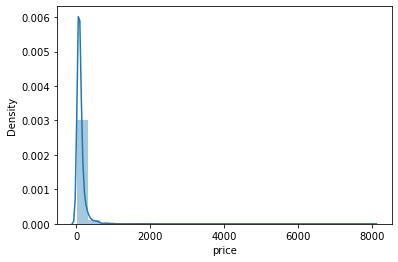

In [14]:
sns.distplot(df['price'], bins=25) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [14]:
df.describe()

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000,4995.000000
mean,48.140613,11.565088,118.425288,9.006807,22.338138,2.559159,135.479680,3.485686
std,0.025502,0.047024,220.480379,31.415472,55.676039,4.541520,136.233306,12.682482
min,48.068870,11.366801,9.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,48.123745,11.540435,55.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,48.137520,11.565530,81.000000,2.000000,4.000000,1.000000,88.000000,0.000000
75%,48.157410,11.586970,125.000000,5.000000,17.000000,2.000000,268.000000,2.000000
max,48.229500,11.711980,8000.000000,1000.000000,765.000000,33.000000,365.000000,450.000000


__04. Exploring Data Visually - Deciding on which Relationship I would like to test__

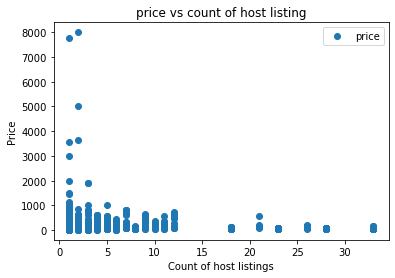

In [15]:
# Create scatter plot price vs calculated_host_listings_count
df.plot(x = 'calculated_host_listings_count', y='price',style='o')
plt.title('price vs count of host listing')  
plt.xlabel('Count of host listings')  
plt.ylabel('Price')  
plt.show()

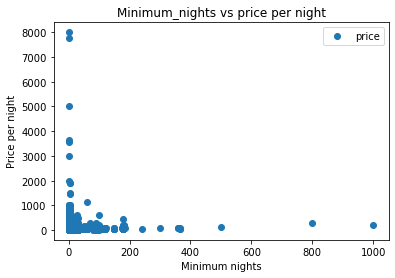

In [16]:
# Create scatterplot minimum_nights vs price

df.plot(x = 'minimum_nights', y='price',style='o')
plt.title('Minimum_nights vs price per night')  
plt.xlabel('Minimum nights')  
plt.ylabel('Price per night')  
plt.show()

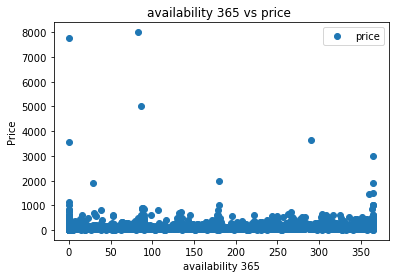

In [15]:
# Create scatterplot minimum_nights vs price

df.plot(x = 'availability_365', y='price',style='o')
plt.title('availability 365 vs price ')  
plt.xlabel('availability 365')  
plt.ylabel('Price')  
plt.show()

I would go ahead with count vs price of listing. as well availability 365 vs price

__calculated_host_listing_count vs Price__

In [17]:
# Reshape the variables, put them into separate objects.

X = df['calculated_host_listings_count'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [18]:
X

array([[2],
       [2],
       [1],
       ...,
       [2],
       [1],
       [2]])

In [19]:
y

array([[ 80.],
       [ 95.],
       [ 99.],
       ...,
       [ 35.],
       [124.],
       [ 77.]])

In [20]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

__5.Regression Analysis__

In [21]:
# Create regression object
regression = LinearRegression()

In [22]:
# Fit it onto training set
regression.fit(X_train, y_train)

LinearRegression()

In [23]:
# Use trained regression object to predict y using X in test set 
y_predicted = regression.predict(X_test)

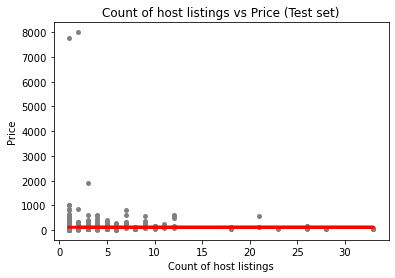

In [24]:
# Create plot showing regression line (results) from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Count of host listings vs Price (Test set)')
plot_test.xlabel('Count of host listings')
plot_test.ylabel('Price')
plot_test.show()

In [25]:
# Create objects that contain model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [26]:
# Check model summary statistics to evaluate performance of model

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00766812]]
Mean squared error:  92861.80142719926
R2 score:  -0.0001502890452689254


We have a positive slope coefficent (0.007) which indicate that as X (Count of host listings) increases, y (Price) also increases.

The MSE is too high, which says that the line is not accurate

The R2 score is low and negative which means a poor fit of the model. The linear relationship between the variables is as expected not strong, so a non-linear model to test this relationship would be a better fit.

In [27]:
# Create a dataframe to compare the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,120.0,117.289327
1,130.0,117.289327
2,230.0,117.289327
3,183.0,117.327668
4,89.0,117.296995
5,163.0,117.289327
6,72.0,117.481030
7,800.0,117.335336
8,53.0,117.289327
9,96.0,117.289327


In [28]:
# Compare how regression fits training set. How well does model predict y in the training set?
y_predicted_train = regression.predict(X_train)

In [29]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [30]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00766812]]
Mean squared error:  29626.052803698884
R2 score:  4.351213611641924e-08


On the training set, the result is not good either. MSE remains high and the R2 score although not negative anymore but remains very low low.

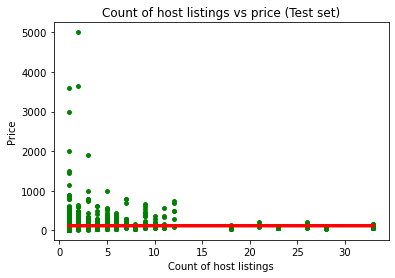

In [31]:
# Visualize it

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Count of host listings vs price (Test set)')
plot_test.xlabel('Count of host listings')
plot_test.ylabel('Price')
plot_test.show()

__availability 365 vs price__

In [16]:
# Reshape the variables, put them into separate objects.

X = df['availability_365'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [17]:
X

array([[ 22],
       [ 52],
       [  4],
       ...,
       [365],
       [ 65],
       [  7]])

In [18]:
y

array([[ 80.],
       [ 95.],
       [ 99.],
       ...,
       [ 35.],
       [124.],
       [ 77.]])

In [19]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

__Regression Analysis__

In [20]:
# Create regression object
regression = LinearRegression()

In [21]:
# Fit it onto training set
regression.fit(X_train, y_train)

LinearRegression()

In [22]:
# Use trained regression object to predict y using X in test set 
y_predicted = regression.predict(X_test)

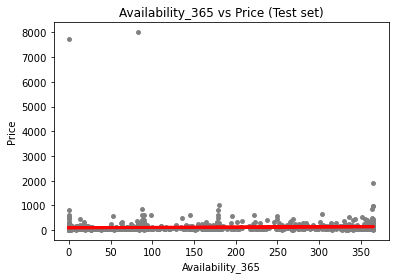

In [23]:
# Create plot showing regression line (results) from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Availability_365 vs Price (Test set)')
plot_test.xlabel('Availability_365')
plot_test.ylabel('Price')
plot_test.show()

In [24]:
# Create objects that contain model summary statistics

rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [25]:
# Check model summary statistics to evaluate performance of model

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.11639126]]
Mean squared error:  92810.37737604641
R2 score:  0.00040356387201168076


We have a positive slope coefficent (0.11) which indicate that as X (Count of host listings) increases, y (Price) also increases.

The MSE is too high, which says that the line is not accurate

The R2 score is low  which mean it is a poor fit of the model. The linear relationship between the variables is as expected not strong, so a non-linear model to test this relationship would be a better fit.

In [26]:
# Create a dataframe to compare the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,120.0,101.545396
1,130.0,123.194171
2,230.0,111.787827
3,183.0,139.488948
4,89.0,101.545396
5,163.0,120.167998
6,72.0,122.495823
7,800.0,101.545396
8,53.0,126.918691
9,96.0,101.545396


In [28]:
# Compare how regression fits training set. How well does model predict y in the training set?
y_predicted_train = regression.predict(X_train)

In [29]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [30]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.11639126]]
Mean squared error:  29375.281276985435
R2 score:  0.008464603994204012


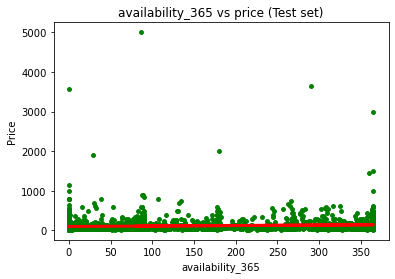

In [32]:
# Visualize it

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('availability_365 vs price (Test set)')
plot_test.xlabel('availability_365')
plot_test.ylabel('Price')
plot_test.show()